# Code Excercises

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

Exercise 10-1.
LU  decomposition  can  be  computationally  intensive,  although  it  is  more  efficient
than  other  decompositions  such  as  QR.  Interestingly,  LU  decomposition  is  often
used  as  a  benchmark  to  compare  computation  times  between  operating  systems,
hardware  processors,  computer  languages  (e.g.,  C  versus  Python  versus  MATLAB),
or  implementation  algorithms.  Out  of  curiousity,  I  tested  how  long  it  took  Python
and MATLAB to run LU decomposition on a thousand matrices of size 100 × 100. On
my laptop, MATLAB took around 300 ms while Python took around 410 ms. Python
on Google Colab took around 1,000 ms. Test how long this takes on your computer

In [5]:
import time 
import scipy as sp 

curr = time.time()

A = np.random.rand(1000, 1000)

P,  L , U = sp.linalg.lu(A)

next = time.time()

print(next - curr)

0.15263748168945312


Exercise 10-2.
Use  the  matrix-multiplication  method  to  make  a  6 × 8  rank-3  matrix.  Take  its  LU
decomposition,  and  show  the  three  matrices  with  their  ranks  in  the  title,  as  in
Figure  10-2.  Notice  the  ranks  of  the  three  matrices  and  that  L  has  all  1s  on  the
diagonal. Feel free to explore the ranks of matrices with other sizes and ranks.
Figure 10-2. Results of Exercise 10-2
Exercise 10-3.
One  application  of  LU  decomposition  is  computing  the  determinant.  Here  are  two
properties of the determinant:4 the determinant of a triangular matrix is the product
of  the  diagonals,  and  the  determinant  of  a  product  matrix  equals  the  product  of
the determinants (that is, det AB = det A det B ). Putting these two facts together,
172 | Chapter 10: Row Reduction and LU Decomposition


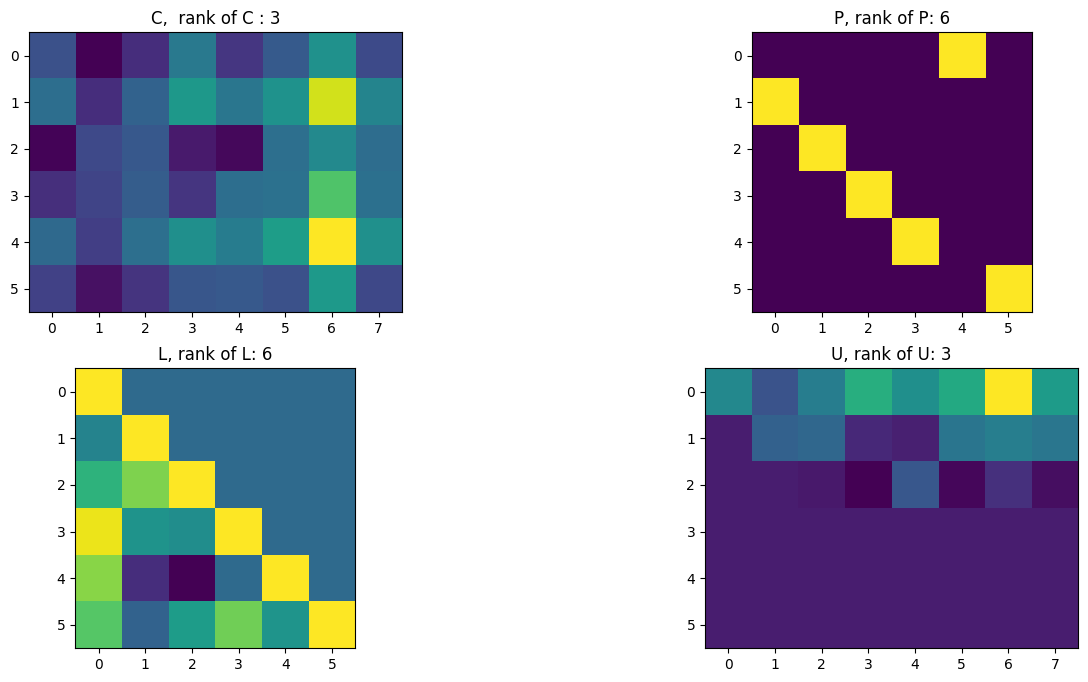

In [9]:
A = np.random.rand(6,  3)
B = np.random.rand(3,  8)

C = A @ B 

P, L, U = sp.linalg.lu(C)

fig, ax =  plt.subplots(2, 2, figsize = (16, 8))
ax[0, 0].imshow(C)
ax[0, 0].set_title(f"C,  rank of C : {np.linalg.matrix_rank(C)}")

ax[0, 1].imshow(P)
ax[0, 1].set_title(f"P, rank of P: {np.linalg.matrix_rank(P)}")

ax[1, 0].imshow(L)
ax[1, 0].set_title(f"L, rank of L: {np.linalg.matrix_rank(L)}")

ax[1, 1].imshow(U)
ax[1, 1].set_title(f"U, rank of U: {np.linalg.matrix_rank(U)}")

plt.show()

Exercise 10-3.
One  application  of  LU  decomposition  is  computing  the  determinant.  Here  are  two
properties of the determinant:4 the determinant of a triangular matrix is the product
of  the  diagonals,  and  the  determinant  of  a  product  matrix  equals  the  product  of
the determinants (that is, det AB = det A det B ). Putting these two facts together,you  can  compute  the  determinant  of  a  matrix  as  the  product  of  the  diagonals  of  L
times  the  product  of  the  diagonals  of  U.  On  the  other  hand,  because  the  diagonals
of L are all 1 (when implemented in Python to ensure uniqueness of the decomposi‐
tion),  then  the  determinant  of  a  matrix  A  is  simply  the  product  of  the  diagonals  of
U. Try it in Python—and compare to the result of np.linalg.det(A)—multiple times
with different random matrices, before reading the next paragraph.
Did  you  get  the  same  result  as  Python?  I  assume  you  found  that  the  determinants
match  in  magnitude  but  that  the  signs  would  seemingly  randomly  differ.  Why  did
that  happen?  It  happened  because  I  omitted  the  permutation  matrix  in  the  instruc‐
tions.  The  determinant  of  a  permutation  matrix  is  +1  for  an  even  number  of  row
swaps  and  −1  for  an  odd  number  of  row  swaps.  Now  go  back  to  your  code  and
include the determinant of P in your computations

In [10]:
# so sánh determinant của 2 kết quả : 

A = np.random.rand(3, 3)

det1 = np.linalg.det(A) 

P, L, U = sp.linalg.lu(A)

det2 = np.linalg.det(U)

print(f'Det using numpy is {det1}')
print(f'Det using LU decomposition is {det2}')

Det using numpy is -0.4072115785902407
Det using LU decomposition is 0.4072115785902407


=> Dấu của 2 định thức bị thay đổi, điều này là do phép hoán vị ma trận gây ra 

In [11]:
print(f'Det of P is {np.linalg.det(P)}')

Det of P is -1.0


Exercise 10-4 Following the formula from the section “LU Decomposition” on page 169, the inverse
of a matrix can be expressed as:
 $$ A = P^TLU \\ 
A^{−1} = (P^TLU)^{−1} \\ 
A^{−1} = U^{−1}L^{−1}P $$
Implement  that  third  equation  directly  using  the  output  from  scipy.linalg.lu  on
a  4 × 4  random-numbers  matrix.  Is  AA−1  the  identity  matrix?  Sometimes  it  is  and
sometimes it isn’t, depending on P. This discrepancy occurs because of what I wrote
about  the  output  of  scipy.linalg.lu.  Adjust  the  code  so  that  it  follows  SciPy’s
convention instead of the math convention.
Here is the take-home message from this exercise: the absence of error messages does
not  necessarily  mean  your  code  is  correct.  Please  sanity-check  your  mathematical
code as much as possible

In [19]:
A = np.random.rand(4, 4)

P, L, U = sp.linalg.lu(A)

invA1 = np.linalg.inv(U) @ np.linalg.inv(L) @ P 
invA2 = np.linalg.inv(A)


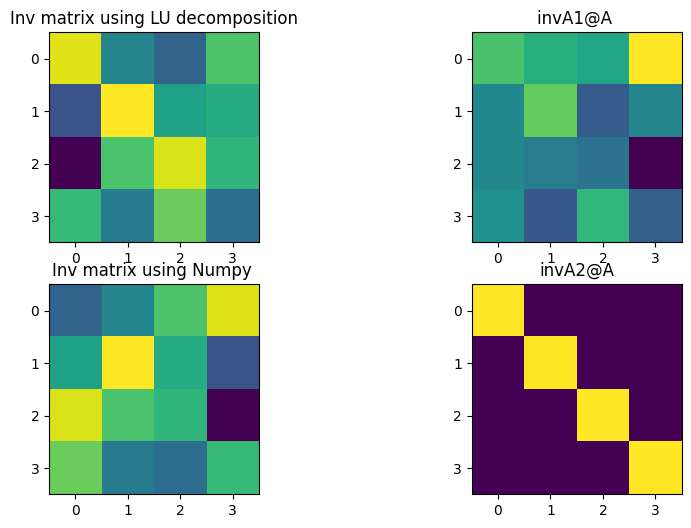

In [22]:
fig, ax = plt.subplots(nrows = 2, ncols =2, figsize = (10, 6))

ax[0, 0].imshow(invA1)
ax[0, 0].set_title("Inv matrix using LU decomposition")
ax[0, 1].imshow(invA1 @ A)
ax[0, 1].set_title("invA1@A ")

ax[1, 0].imshow(invA2)
ax[1, 0].set_title("Inv matrix using Numpy ")
ax[1, 1].imshow(invA2 @ A)
ax[1, 1].set_title("invA2@A")


plt.show()

=> Có thể thấy, hai ma trận sử dụng numpy có tính chính xác cao hơn là sử dụng LU, điều này phụ thuộc vào giá trị của P 

Exercise 10-5.
For  matrix $ A= PLU $  (using  Python’s  ordering  of  the  permutation  matrix),  ATA  can
be  computed  as  $U^TL^TLU $—without  the  permutation  matrices.  Why  is  it  possible  to
drop the permutation matrix? Answer the question and then confirm in Python using
random matrices that $ A^TA= U^TL^TLU $ even when $P≠ I$.

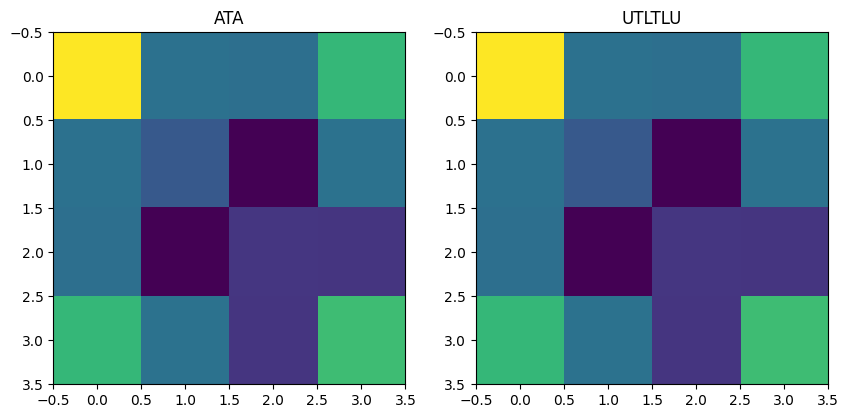

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

ax[0].imshow(A.T@A)
ax[0].set_title('ATA')

ax[1].imshow(U.T @ L.T @ L @ U)
ax[1].set_title('UTLTLU')

plt.show()

=> Bất kể giá trị P, thì $A^TA$ luôn bằng với $U^TL^TLU$